## Linear Regression

In [1]:
import seaborn as sns
def plot_cnf_matirx(cnf_matrix,description):
    class_names = [0,1]
    fig,ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks,class_names)
    plt.yticks(tick_marks,class_names)

#create a heat map
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'OrRd',
               fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title(description, y = 1.1,fontsize=16)
    plt.ylabel('Reference',fontsize=12)
    plt.xlabel('Precision',fontsize=12)
    plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
from sklearn import datasets, linear_model

In [3]:
cardio = pd.read_csv('cardio.csv', header=0) # the first line of data is header

In [4]:
cardio.head()

,Unnamed: 0,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
cardio.isnull().sum()

Unnamed: 0     0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
cardio.shape

(68426, 13)

In [7]:
cardio.columns

Index(['Unnamed: 0', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [8]:
# one-hot vectors for df_data
cardio_new = pd.get_dummies(cardio)
cardio_new.columns

Index(['Unnamed: 0', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [9]:
cardio_new.head(2).append(cardio_new.tail(2))

/var/folders/69/x25tnjb926g72_vkx30nqdhw0000gn/T/ipykernel_35312/2142022311.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cardio_new.head(2).append(cardio_new.tail(2))


,Unnamed: 0,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
68424,69998,61,1,163,72.0,135,80,1,2,0,0,0,1
68425,69999,56,1,170,72.0,120,80,2,1,0,0,1,0


In [10]:
df_X = cardio_new.drop(columns=['cardio'])
df_y = cardio_new[['cardio']]

In [11]:
df_X.head()

,Unnamed: 0,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,50,2,168,62.0,110,80,1,1,0,0,1
1,1,55,1,156,85.0,140,90,3,1,0,0,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0
3,3,48,2,169,82.0,150,100,1,1,0,0,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0


In [12]:
df_y.head()

,cardio
0,0
1,1
2,1
3,1
4,0


In [13]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression

# Splitting data into training/testing
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

In [14]:
# 75% is for training and 25% is for testing
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, 
                                                    test_size = 0.25,
                                                    random_state=123)

In [15]:
feature_train = X_train[['age', 'gender','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']]

In [16]:
feature_train.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
21481,54,1,90.0,120,80,2,2,0,0,1
57400,59,1,84.0,100,80,3,1,0,0,1
46598,54,1,65.0,120,80,1,1,0,0,0
34103,62,2,73.0,130,80,2,1,0,0,1
46269,41,2,59.0,120,80,1,1,0,0,0


In [17]:
feature_train.mean()

age             52.795612
gender           1.349500
weight          74.098494
ap_hi          126.406224
ap_lo           81.185039
cholesterol      1.362965
gluc             1.223855
smoke            0.087784
alco             0.053372
active           0.803562
dtype: float64

In [18]:
lr = LinearRegression()
lr.fit(feature_train, y_train)

LinearRegression()

In [19]:
# Metrics
feature_test = X_test[['age', 'gender','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']]
print(feature_test)

       age  gender  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
62946   50       2    80.0    120     80            1     1      0     0   
760     54       1    75.0    160     90            3     1      0     0   
63094   56       2    75.0    120     80            1     1      0     0   
30212   63       2    62.0    120     80            2     1      0     0   
20716   56       2    80.0    150     90            1     1      0     0   
...    ...     ...     ...    ...    ...          ...   ...    ...   ...   
50571   51       1    99.0    130     80            1     1      0     0   
31229   47       1    51.0    130     80            1     1      0     0   
16805   51       1   124.0    160     90            2     1      0     0   
61265   49       1    77.0    150     90            3     2      0     0   
33487   52       1    98.0    100     60            2     2      0     0   

       active  
62946       0  
760         1  
63094       1  
30212       1  
20716  

In [20]:
predictions = lr.predict(feature_test)
print(predictions)
print(len(predictions))

[[0.41030862]
 [1.04202182]
 [0.41699764]
 ...
 [1.01216051]
 [0.86874972]
 [0.25721799]]
17107


In [21]:
mae = np.mean(abs(predictions - y_test))
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print('Using Linear Regression, MAE is %0.2f' %  mae)  
print('Using Linear Regression, RMSE is %0.2f' %  rmse)    

Using Linear Regression, MAE is 0.39
Using Linear Regression, RMSE is 0.44


/Users/pzj/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [22]:
print('w0:',lr.intercept_)
print('w1,w2,w3,w4,w5,w6,w7,w8,w9,w10:',lr.coef_)

w0: [-1.75193233]
w1,w2,w3,w4,w5,w6,w7,w8,w9,w10: [[ 0.01037894 -0.01045717  0.00200213  0.01053025  0.00204573  0.09682875
  -0.02007914 -0.03072393 -0.03355926 -0.04557396]]


In [23]:
print(y_test)

       cardio
62946       0
760         1
63094       0
30212       1
20716       1
...       ...
50571       1
31229       0
16805       1
61265       1
33487       0

[17107 rows x 1 columns]


### Stroke Dataset

In [25]:
stroke = pd.read_csv('stroke.csv', header=0) # the first line of data is header

In [26]:
# one-hot vectors for df_data
stroke_new = pd.get_dummies(stroke)
stroke_new.columns

Index(['Unnamed: 0', 'gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'],
      dtype='object')

In [27]:
df_stroke_X = stroke_new.drop(columns=['stroke'])
df_stroke_y = stroke_new[['stroke']]

In [28]:
df_stroke_X

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,0,67.0,0,1,1,3,1,228.69,36.6,0
1,1,1,61.0,0,0,1,4,0,202.21,0.0,1
2,2,0,80.0,0,1,1,3,0,105.92,32.5,1
3,3,1,49.0,0,0,1,3,1,171.23,34.4,2
4,4,1,79.0,1,0,1,4,0,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,5105,1,80.0,1,0,1,3,1,83.75,0.0,1
5106,5106,1,81.0,0,0,1,4,1,125.20,40.0,1
5107,5107,1,35.0,0,0,1,4,0,82.99,30.6,1
5108,5108,0,51.0,0,0,1,3,0,166.29,25.6,0


In [29]:
df_stroke_y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [30]:
# 75% is for training and 25% is for testing
X_stroke_train, X_stroke_test, y_stroke_train, y_stroke_test = train_test_split(df_stroke_X, df_stroke_y, 
                                                    test_size = 0.25,
                                                    random_state=123)

In [31]:
stroke_feature_train = X_stroke_train[['age', 'gender','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]

In [32]:
lr = LinearRegression()
lr.fit(stroke_feature_train, y_stroke_train)

LinearRegression()

In [33]:
# Metrics
stroke_feature_test = X_stroke_test[['age', 'gender','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
print(stroke_feature_test)

       age  gender  hypertension  heart_disease  ever_married  work_type  \
1708  14.0       0             0              0             0          0   
4768  17.0       1             0              0             0          3   
1972  39.0       1             0              0             1          3   
981   46.0       1             0              0             1          3   
2423  13.0       1             0              0             0          0   
...    ...     ...           ...            ...           ...        ...   
1877   3.0       1             0              0             0          0   
2283  64.0       0             0              1             1          3   
852   17.0       1             0              0             0          3   
4815  19.0       1             0              0             0          3   
3228  54.0       0             0              0             1          3   

      Residence_type  avg_glucose_level   bmi  smoking_status  
1708               1   

In [34]:
stroke_predictions = lr.predict(stroke_feature_test)
print(stroke_predictions)
print(len(stroke_predictions))

[[ 0.0058633 ]
 [ 0.00238609]
 [ 0.00547148]
 ...
 [-0.0294162 ]
 [ 0.00716009]
 [ 0.06428737]]
1278


In [35]:
mae = np.mean(abs(stroke_predictions - y_stroke_test))
rmse = np.sqrt(np.mean((stroke_predictions - y_stroke_test) ** 2))
print('Using Linear Regression, MAE is %0.2f' %  mae)  
print('Using Linear Regression, RMSE is %0.2f' %  rmse)    

Using Linear Regression, MAE is 0.09
Using Linear Regression, RMSE is 0.20


/Users/pzj/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [36]:
print('w0:',lr.intercept_)
print('w1,w2,w3,w4,w5,w6,w7,w8,w9,w10:',lr.coef_)

w0: [-0.02923405]
w1,w2,w3,w4,w5,w6,w7,w8,w9,w10: [[ 0.00302523  0.00362977  0.0342592   0.0429476  -0.03988453 -0.00584576
   0.00577642  0.00038326 -0.00235405  0.00167076]]


## SVM

In [38]:
from sklearn import svm, datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [39]:
clf1 = svm.SVC(C = 0.5,kernel = 'linear')
clf1.fit(feature_train,y_train)

/Users/pzj/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.5, kernel='linear')

In [40]:
clf1_pred = clf1.predict(feature_test)

In [41]:
clf1.score(feature_test,y_test)

0.7222189746887239

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
print("confusion matrics:\n",confusion_matrix(y_test,clf1_pred))
print("\n\nclassification report:\n",classification_report(y_test,clf1_pred))

confusion matrics:
 [[7095 1605]
 [3147 5260]]


classification report:
               precision    recall  f1-score   support

           0       0.69      0.82      0.75      8700
           1       0.77      0.63      0.69      8407

    accuracy                           0.72     17107
   macro avg       0.73      0.72      0.72     17107
weighted avg       0.73      0.72      0.72     17107



In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:{}".format(accuracy_score(y_test, clf1_pred)))
print("Precision:{}".format(precision_score(y_test, clf1_pred)))
print("Recall:{}".format(recall_score(y_test, clf1_pred)))
print("F1 score:{}".format(f1_score(y_test, clf1_pred)))

Accuracy:0.7222189746887239
Precision:0.7662053896576839
Recall:0.6256690852860711
F1 score:0.6888423258250392


confusion matrics:
 [[7095 1605]
 [3147 5260]]


classification report:
               precision    recall  f1-score   support

           0       0.69      0.82      0.75      8700
           1       0.77      0.63      0.69      8407

    accuracy                           0.72     17107
   macro avg       0.73      0.72      0.72     17107
weighted avg       0.73      0.72      0.72     17107



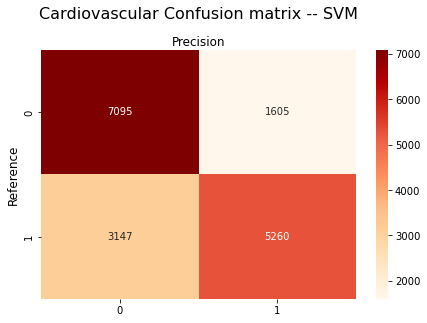

/Users/pzj/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


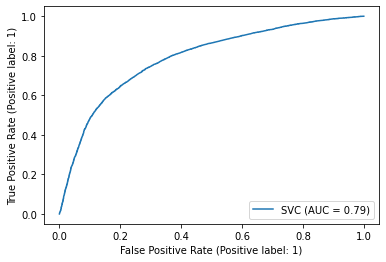

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = clf1.predict(feature_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("confusion matrics:\n", cnf_matrix)
print("\n\nclassification report:\n",classification_report(y_test,y_pred))
plot_cnf_matirx(cnf_matrix,'Cardiovascular Confusion matrix -- SVM')
metrics.plot_roc_curve(clf1,feature_test,y_test)

## Logistic Regression

### Cardiovascular Disease dataset

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
log_regression = LogisticRegression(max_iter=1000)
car_ = log_regression.fit(feature_train, y_train)
y_test_lr_pred = log_regression.predict(feature_test)

/Users/pzj/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:{}".format(accuracy_score(y_test, y_test_lr_pred)))
print("Precision:{}".format(precision_score(y_test, y_test_lr_pred)))
print("Recall:{}".format(recall_score(y_test, y_test_lr_pred)))
print("F1 score:{}".format(f1_score(y_test, y_test_lr_pred)))

Accuracy:0.7257847664698661
Precision:0.7493959731543625
Recall:0.6640894492684668
F1 score:0.7041685060225769


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_lr_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.74      8700
           1       0.75      0.66      0.70      8407

    accuracy                           0.73     17107
   macro avg       0.73      0.72      0.72     17107
weighted avg       0.73      0.73      0.72     17107



In [48]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_test_lr_pred)
cnf_matrix

array([[6833, 1867],
       [2824, 5583]])

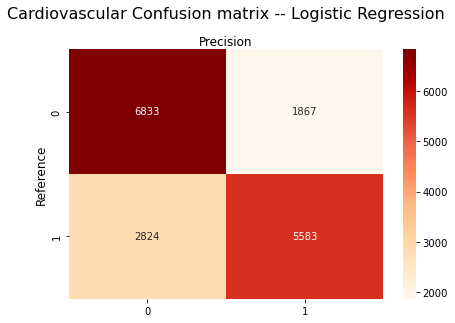

In [49]:
import seaborn as sns
def plot_cnf_matirx(cnf_matrix,description):
    class_names = [0,1]
    fig,ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks,class_names)
    plt.yticks(tick_marks,class_names)

#create a heat map
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'OrRd',
               fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title(description, y = 1.1,fontsize=16)
    plt.ylabel('Reference',fontsize=12)
    plt.xlabel('Precision',fontsize=12)
    plt.show()
    
plot_cnf_matirx(cnf_matrix,'Cardiovascular Confusion matrix -- Logistic Regression')


/Users/pzj/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


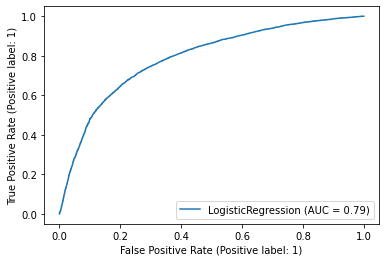

In [50]:
metrics.plot_roc_curve(log_regression,feature_test,y_test)

### Stroke Dataset

In [51]:
str_ = log_regression.fit(stroke_feature_train, y_stroke_train)
y_test_stroke_lr_pred = log_regression.predict(stroke_feature_test)

/Users/pzj/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
print("Accuracy:{}".format(accuracy_score(y_stroke_test, y_test_stroke_lr_pred)))
print("Precision:{}".format(precision_score(y_stroke_test, y_test_stroke_lr_pred)))
print("Recall:{}".format(recall_score(y_stroke_test, y_test_stroke_lr_pred)))
print("F1 score:{}".format(f1_score(y_stroke_test, y_test_stroke_lr_pred)))

Accuracy:0.9538341158059468
Precision:0.0
Recall:0.0
F1 score:0.0


In [53]:
print(classification_report(y_stroke_test, y_test_stroke_lr_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1220
           1       0.00      0.00      0.00        58

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



### Balance the stroke dataset

In [54]:
from sklearn.utils import resample
stroke_majority = stroke_new[stroke_new.stroke==0]
stroke_minority = stroke_new[stroke_new.stroke==1]

stroke_majority_downsampled = resample(stroke_majority,
                                 replace=False,    
                                 n_samples=249,     
                                 random_state=123)

stroke_downsampled = pd.concat([stroke_majority_downsampled, stroke_minority])
stroke_downsampled.stroke.value_counts()

0    249
1    249
Name: stroke, dtype: int64

In [55]:
new_y = stroke_downsampled.stroke
new_x = stroke_downsampled.drop('stroke', axis=1)

X_stroke_train1, X_stroke_test1, y_stroke_train1, y_stroke_test1 = train_test_split(new_x, new_y, 
                                                    test_size = 0.2,
                                                    random_state=123)

new_stroke_feature_train = X_stroke_train1[['age', 'gender','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
new_stroke_feature_test = X_stroke_test1[['age', 'gender','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]

str_1 = log_regression.fit(new_stroke_feature_train, y_stroke_train1)
y_test_stroke_lr_pred1 = log_regression.predict(new_stroke_feature_test)

print("Accuracy:{}".format(accuracy_score(y_stroke_test1, y_test_stroke_lr_pred1)))
print("Precision:{}".format(precision_score(y_stroke_test1, y_test_stroke_lr_pred1)))
print("Recall:{}".format(recall_score(y_stroke_test1, y_test_stroke_lr_pred1)))
print("F1 score:{}".format(f1_score(y_stroke_test1, y_test_stroke_lr_pred1)))

Accuracy:0.77
Precision:0.7017543859649122
Recall:0.8695652173913043
F1 score:0.7766990291262136


In [56]:
print(classification_report(y_stroke_test1, y_test_stroke_lr_pred1))

              precision    recall  f1-score   support

           0       0.86      0.69      0.76        54
           1       0.70      0.87      0.78        46

    accuracy                           0.77       100
   macro avg       0.78      0.78      0.77       100
weighted avg       0.79      0.77      0.77       100



In [57]:
cnf_matrix_stroke = confusion_matrix(y_stroke_test1, y_test_stroke_lr_pred1)
cnf_matrix_stroke

array([[37, 17],
       [ 6, 40]])

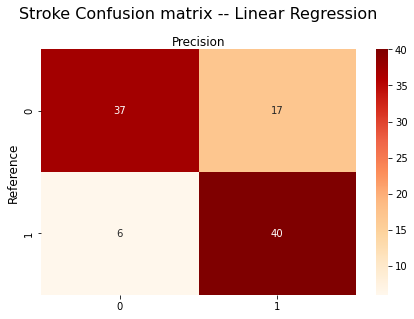

In [58]:
plot_cnf_matirx(cnf_matrix_stroke,'Stroke Confusion matrix -- Linear Regression')

## Decision Tree

### Cardiovascular Disease dataset

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
dtclf.fit(feature_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [60]:
y_train_dt_car_pred =dtclf.predict(feature_train)
y_test_dt_car_pred = dtclf.predict(feature_test)
print(y_train_dt_car_pred)
print(y_test_dt_car_pred)

[0 1 0 ... 0 1 0]
[0 1 0 ... 1 1 0]


In [61]:
print("Accuracy:{}".format(accuracy_score(y_test, y_test_dt_car_pred)))
print("Precision:{}".format(precision_score(y_test, y_test_dt_car_pred)))
print("Recall:{}".format(recall_score(y_test, y_test_dt_car_pred)))
print("F1 score:{}".format(f1_score(y_test, y_test_dt_car_pred)))

Accuracy:0.7279476237797393
Precision:0.745390349156532
Recall:0.6780064232187463
F1 score:0.7101034010215522


In [62]:
print(classification_report(y_test,y_test_dt_car_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      8700
           1       0.75      0.68      0.71      8407

    accuracy                           0.73     17107
   macro avg       0.73      0.73      0.73     17107
weighted avg       0.73      0.73      0.73     17107



In [63]:
cnf_matrix_car_dt = confusion_matrix(y_test,y_test_dt_car_pred)
cnf_matrix_car_dt

array([[6753, 1947],
       [2707, 5700]])

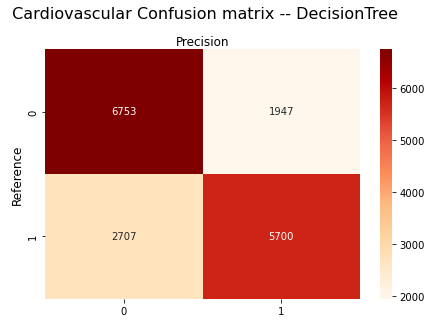

In [64]:
plot_cnf_matirx(cnf_matrix_car_dt,' Cardiovascular Confusion matrix -- DecisionTree')

/Users/pzj/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


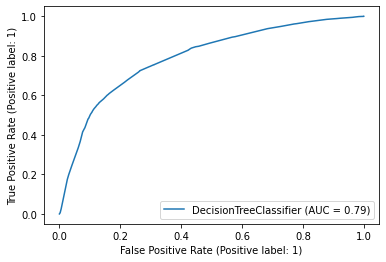

In [65]:
metrics.plot_roc_curve(dtclf,feature_test,y_test)

### Stroke dataset

In [66]:
dtclf.fit(new_stroke_feature_train, y_stroke_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [67]:
y_train_dt_str_pred =dtclf.predict(new_stroke_feature_train)
y_test_dt_str_pred = dtclf.predict(new_stroke_feature_test)
print(y_train_dt_str_pred)
print(y_test_dt_str_pred)

[1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0
 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0
 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1
 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0
 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0
 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0
 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0
 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0
 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0
 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1]
[1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1

In [68]:
print("Accuracy:{}".format(accuracy_score(y_stroke_test1, y_test_dt_str_pred)))
print("Precision:{}".format(precision_score(y_stroke_test1, y_test_dt_str_pred)))
print("Recall:{}".format(recall_score(y_stroke_test1, y_test_dt_str_pred)))
print("F1 score:{}".format(f1_score(y_stroke_test1, y_test_dt_str_pred)))

Accuracy:0.66
Precision:0.603448275862069
Recall:0.7608695652173914
F1 score:0.673076923076923


In [69]:
print(classification_report(y_stroke_test1, y_test_dt_str_pred))

              precision    recall  f1-score   support

           0       0.74      0.57      0.65        54
           1       0.60      0.76      0.67        46

    accuracy                           0.66       100
   macro avg       0.67      0.67      0.66       100
weighted avg       0.68      0.66      0.66       100



In [70]:
cnf_matrix_str_dt = confusion_matrix(y_stroke_test1, y_test_dt_str_pred)
cnf_matrix_str_dt

array([[31, 23],
       [11, 35]])

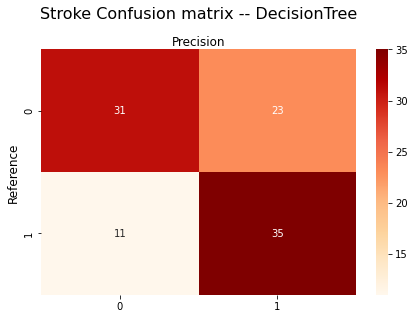

In [71]:
plot_cnf_matirx(cnf_matrix_str_dt,'Stroke Confusion matrix -- DecisionTree')

/Users/pzj/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


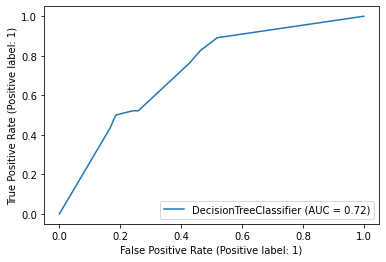

In [72]:
metrics.plot_roc_curve(dtclf,new_stroke_feature_test,y_stroke_test1)

## SVM for Balanced Stroke Dataset

In [73]:
clf3 = svm.SVC(C = 0.5,kernel = 'linear')
clf3.fit(new_stroke_feature_train,y_stroke_train1)

SVC(C=0.5, kernel='linear')

In [74]:
clf3_pred = clf3.predict(new_stroke_feature_test)
y_train_svm_str_pred =clf3.predict(new_stroke_feature_train)
y_test_svm_str_pred = clf3.predict(new_stroke_feature_test)

In [75]:
print("Accuracy:{}".format(accuracy_score(y_stroke_test1, y_test_svm_str_pred)))
print("Precision:{}".format(precision_score(y_stroke_test1, y_test_svm_str_pred)))
print("Recall:{}".format(recall_score(y_stroke_test1, y_test_svm_str_pred)))
print("F1 score:{}".format(f1_score(y_stroke_test1, y_test_svm_str_pred)))

Accuracy:0.77
Precision:0.7017543859649122
Recall:0.8695652173913043
F1 score:0.7766990291262136


In [76]:
print("confusion matrics:\n",confusion_matrix(y_stroke_test1,clf3_pred))
print("\n\nclassification report:\n",classification_report(y_stroke_test1,clf3_pred))

confusion matrics:
 [[37 17]
 [ 6 40]]


classification report:
               precision    recall  f1-score   support

           0       0.86      0.69      0.76        54
           1       0.70      0.87      0.78        46

    accuracy                           0.77       100
   macro avg       0.78      0.78      0.77       100
weighted avg       0.79      0.77      0.77       100



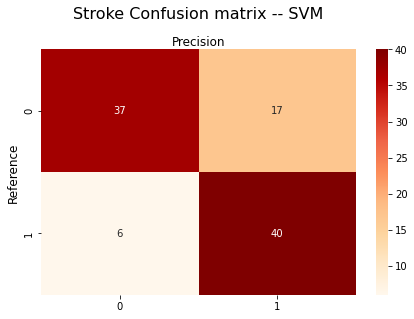

In [77]:
cnf_matrix_str_svm = confusion_matrix(y_stroke_test1, y_test_svm_str_pred)
plot_cnf_matirx(cnf_matrix_str_svm,'Stroke Confusion matrix -- SVM')

## Linear Regression for Balanced Stroke Dataset

In [78]:
lr = LinearRegression()
lr.fit(new_stroke_feature_train, y_stroke_train1)

LinearRegression()

In [79]:
new_predictions = lr.predict(new_stroke_feature_test)
print(new_predictions)
print(len(new_predictions))

[ 0.45201005  0.61684605  0.35250017  0.56033838  0.56886273  0.0878048
  0.06697463  0.02369708  0.46995838  0.70249147  0.42776869  0.51566538
  1.08958175  0.62402344  0.34776308  0.61693278  0.18145048  0.71896769
  0.759241    0.42237614  0.34226292  0.03756254  0.47456244  0.69324687
  0.38549426  0.08921985  0.39835399  0.89959306  0.03975035  0.54387436
  0.39181066  0.10850057  0.74895691  0.7634967   0.25900411  0.90581919
  0.39779369  0.58912966  0.67031584  0.58471728  0.82266012  0.4939689
  0.8021722   0.6819534   0.45960259  0.03636425  0.11842225  1.05521496
  0.34454776  0.96443091  0.83826516  0.55970142  0.78292553  0.30986549
  0.90498576  0.78399248  0.25902886  0.10614335  0.66569037  0.73783923
  0.82466253  0.83516533  0.74438116  0.65450535  0.55435379  0.61464199
  0.839243    0.95712381  0.1037569   0.38151776  0.91541204  0.03804308
  0.67378282  0.12257277  0.1440603   0.67613901  0.27194637  0.41675339
  0.50719543  0.91656043  0.80297305  0.82803386  0.8

In [80]:
mae = np.mean(abs(new_predictions - y_stroke_test1))
rmse = np.sqrt(np.mean((new_predictions - y_stroke_test1) ** 2))
print('Using Linear Regression, MAE is %0.2f' %  mae)  
print('Using Linear Regression, RMSE is %0.2f' %  rmse)    

Using Linear Regression, MAE is 0.35
Using Linear Regression, RMSE is 0.42


In [81]:
print('w0:',lr.intercept_)
print('w1,w2,w3,w4,w5,w6,w7,w8,w9,w10:',lr.coef_)

w0: -0.19980633541332216
w1,w2,w3,w4,w5,w6,w7,w8,w9,w10: [ 0.01404056  0.01472625  0.05503258  0.06480097 -0.08533749 -0.02669053
  0.07155995  0.00047909 -0.00336384  0.03566789]


In [83]:
new_stroke_feature_train.mean()

age                   55.088844
gender                 0.562814
hypertension           0.180905
heart_disease          0.118090
ever_married           0.778894
work_type              2.778894
Residence_type         0.494975
avg_glucose_level    119.098693
bmi                   26.947739
smoking_status         1.381910
dtype: float64